estimated coefficient are:
b_0=-0.4606060606060609
b_1=1.1696969696969697


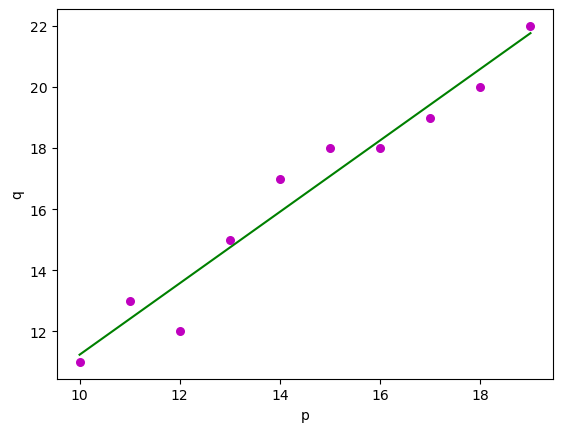

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def estimate_coeff(p,q):
    n1=np.size(p)
    m_p=np.mean(p)
    m_q=np.mean(q)
    SS_pq=np.sum(p*q)-n1*m_q*m_p
    SS_pp=np.sum(p*p)-n1*m_p*m_p
    b_1=SS_pq/SS_pp
    b_0=m_q-b_1*m_p
    return (b_0,b_1)
def plot_regression_line(p,q,b):
    plt.scatter (p,q,color="m",marker="o",s=30)
    q_pred=b[0]+b[1]*p
    plt.plot(p,q_pred,color="g")
    plt.xlabel("p")
    plt.ylabel("q")
    plt.show()
def main():
    p=np.array([10,11,12,13,14,15,16,17,18,19])
    q=np.array([11,13,12,15,17,18,18,19,20,22])
    b=estimate_coeff(p,q)
    print("estimated coefficient are:\nb_0={}\nb_1={}".format(b[0],b[1]))
    plot_regression_line(p,q,b)
if __name__ =="__main__":
        main()

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets as DS
from sklearn import linear_model as LM
from sklearn import metrics as mts
from sklearn.model_selection import train_test_split as tts 

regression coefficients are : [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
variance score is: 0.720905667266178


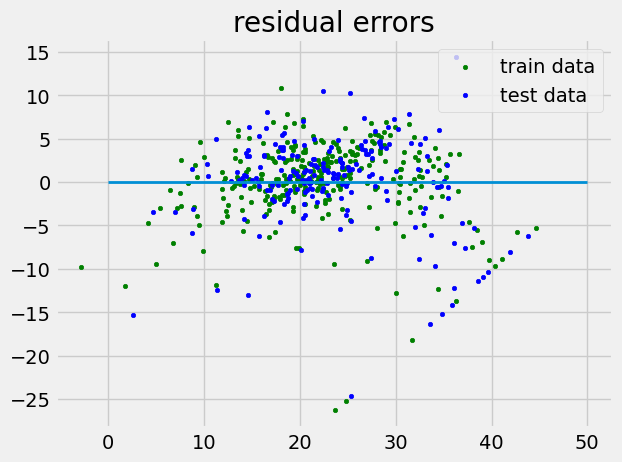

In [19]:
boston1=DS.load_boston(return_X_y=False)
H=boston1.data
f=boston1.target
H_train,H_test,f_train,f_test=tts(H,f,test_size=0.4,random_state=1)
reg1=LM.LinearRegression()
reg1.fit(H_train,f_train)
print('regression coefficients are :',reg1.coef_)
print('variance score is: {}'.format(reg1.score(H_test,f_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg1.predict(H_train),reg1.predict(H_train)-f_train, color="green",s=10,label='train data')
plt.scatter(reg1.predict(H_test),reg1.predict(H_test)-f_test, color="blue",s=10,label='test data')
plt.hlines(y=0, xmin=0,xmax=50,linewidth=2)
plt.legend(loc="upper right")
plt.title("residual errors")
plt.show()